### Introduction to Word Embeddings: word2vec and SentenceTransformer

In this notebook, we will learn about Word2Vec and Sentence Transformers, two powerful tools that help machines understand words and sentences. 

### What are word embeddings

Imagine you want a computer to understand the meaning of words. How can we represent words in a way that computers can understand? The answer is word embeddings.

Word embeddings are just numbers (vectors) that represent words. These numbers capture the meaning of the words in such a way that similar words (like "king" and "queen") will have similar numbers.

Instead of treating words as individual strings (like "king" is just "king"), we represent words as dense vectors in a high-dimensional space.

> What is Word2Vec?
Word2Vec is a model that learns to map words to vectors, capturing how words are used in context. Words that appear in similar contexts (e.g., "cat" and "dog") end up with similar vectors. Word2Vec learns these word vectors by reading through lots of text data and figuring out how words are related to each other.

We'll use a pre-trained Word2Vec model (trained on Google News) to explore word embeddings.

FIRST STEP: 
1. Download "ready-to-use" Word2Vec from https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?resourcekey=0-wjGZdNAUop6WykTtMip30g
2. Unzip the file and put the "bin" file in the project directory.

In [5]:
from gensim.models import KeyedVectors

# Path to the downloaded model
model_path = 'GoogleNews-vectors-negative300.bin'

# Load the model
word2vec = KeyedVectors.load_word2vec_format(model_path, binary=True)

vector = word2vec['cat']
print(vector)

[ 0.0123291   0.20410156 -0.28515625  0.21679688  0.11816406  0.08300781
  0.04980469 -0.00952148  0.22070312 -0.12597656  0.08056641 -0.5859375
 -0.00445557 -0.296875   -0.01312256 -0.08349609  0.05053711  0.15136719
 -0.44921875 -0.0135498   0.21484375 -0.14746094  0.22460938 -0.125
 -0.09716797  0.24902344 -0.2890625   0.36523438  0.41210938 -0.0859375
 -0.07861328 -0.19726562 -0.09082031 -0.14160156 -0.10253906  0.13085938
 -0.00346375  0.07226562  0.04418945  0.34570312  0.07470703 -0.11230469
  0.06738281  0.11230469  0.01977539 -0.12353516  0.20996094 -0.07226562
 -0.02783203  0.05541992 -0.33398438  0.08544922  0.34375     0.13964844
  0.04931641 -0.13476562  0.16308594 -0.37304688  0.39648438  0.10693359
  0.22167969  0.21289062 -0.08984375  0.20703125  0.08935547 -0.08251953
  0.05957031  0.10205078 -0.19238281 -0.09082031  0.4921875   0.03955078
 -0.07080078 -0.0019989  -0.23046875  0.25585938  0.08984375 -0.10644531
  0.00105286 -0.05883789  0.05102539 -0.0291748   0.193359

Now that we have word embeddings, let's try to visualize them. Since word embeddings are high-dimensional (300-dimensional in the case of Word2Vec), it's difficult to see how words are related in this space. That's where PCA (Principal Component Analysis) comes in.

PCA helps reduce the number of dimensions and shows us the most important features of the data.
After applying PCA, we can plot the words on a 2D graph and see how similar they are.
Let’s select a few words and plot their embeddings using PCA:

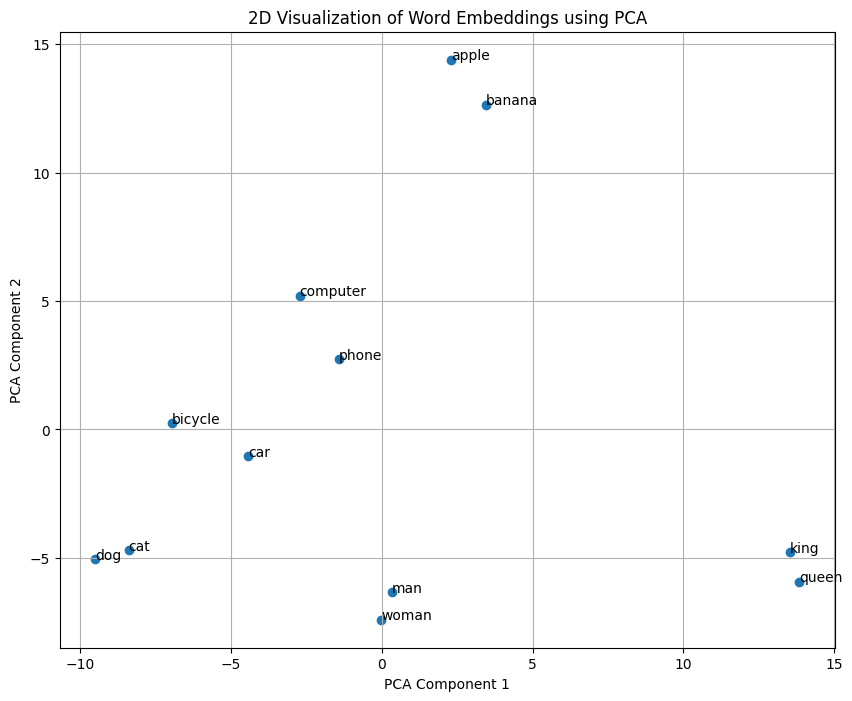

In [7]:
import gensim.downloader as api
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from gensim.models import KeyedVectors

model_path = 'GoogleNews-vectors-negative300.bin'

# Load the model
model = KeyedVectors.load_word2vec_format(model_path, binary=True)

words = ['king', 'queen', 'man', 'woman', 'dog', 'cat', 'apple', 'banana', 'car', 'bicycle', 'computer', 'phone']
word_vectors = [model[word] for word in words]

pca = PCA(n_components=2)
word_vectors_scaled = StandardScaler().fit_transform(word_vectors)
word_vectors_2d = pca.fit_transform(word_vectors_scaled)

plt.figure(figsize=(10, 8))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, (word_vectors_2d[i, 0], word_vectors_2d[i, 1]))

plt.title('2D Visualization of Word Embeddings using PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()


What Do We See?

- Words that are semantically similar (e.g., "king" and "queen") will appear close together.
- Words that are very different (e.g., "king" and "apple") will be far apart in the plot.

This visualization shows how the Word2Vec model understands relationships between words!

One interesting property of Word2Vec embeddings is that it can capture certain relationships between words, like analogies. A well-known example is:

king - man + woman ≈ queen


In other words, if you subtract the vector for "man" from the vector for "king" and then add the vector for "woman", the result is a vector that is close to the vector for "queen". This shows how Word2Vec learns relationships between words in its vector space.

Let’s demonstrate this with an example:

In [14]:
# king - man + woman
king = model["king"]
man = model["man"]
woman = model["woman"]

# king - man + woman
vector = king - man + woman

# Find the closest words to the resulting vector
result = model.most_similar([vector], topn=10)

# Print the result
print(f"Result of 'king' - 'man' + 'woman':\n")
for item in result:
    print(f"{item}")

Result of 'king' - 'man' + 'woman':

('king', 0.8449392318725586)
('queen', 0.7300517559051514)
('monarch', 0.645466148853302)
('princess', 0.6156251430511475)
('crown_prince', 0.5818676352500916)
('prince', 0.5777117609977722)
('kings', 0.5613663792610168)
('sultan', 0.5376775860786438)
('Queen_Consort', 0.5344247817993164)
('queens', 0.5289887189865112)


This example shows how Word2Vec captures semantic relationships between words. It learns not only individual word meanings but also the relationships between word.

### Understanding Sentence Embedding

Now, let’s take things to the next level: instead of just words, we can represent entire sentences. Sentence embeddings help us capture the meaning of a sentence in a single vector.

> What is a Sentence Embedding?
Just like words have embeddings, sentences can also have embeddings. A sentence embedding is a vector that represents the meaning of an entire sentence. This is useful for tasks like document similarity, search engines, and question-answering systems.

We will use the Sentence-Transformer model, which is trained to create good sentence embeddings.

`pip install sentence-transformers`

In [2]:
from sentence_transformers import SentenceTransformer

# Load the pre-trained Sentence Transformer model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Example sentences
sentences = [
    "I love programming.",
    "Python is an amazing language.",
    "The sky is blue.",
    "I enjoy playing sports.",
    "Machine learning is fun!"
]

# Generate sentence embeddings
sentence_embeddings = model.encode(sentences)

# Print the sentence embeddings
print("Sentence Embeddings:\n", sentence_embeddings)

Sentence Embeddings:
 [[-0.45430577 -0.5521016  -0.92252064 ... -0.22952819  0.28538534
  -0.63846046]
 [-0.30550036 -0.71980345 -0.7999118  ...  0.5681144   0.77249265
  -0.22761413]
 [ 0.10204191  0.5089701   0.0339713  ...  0.02633068 -1.2316338
   0.63121593]
 [ 0.58640707  0.02613748  0.32491606 ...  0.00135164  0.03393051
   0.06553293]
 [-0.45839864 -0.49723583 -0.11976884 ...  0.07943565 -0.283783
   0.18126304]]


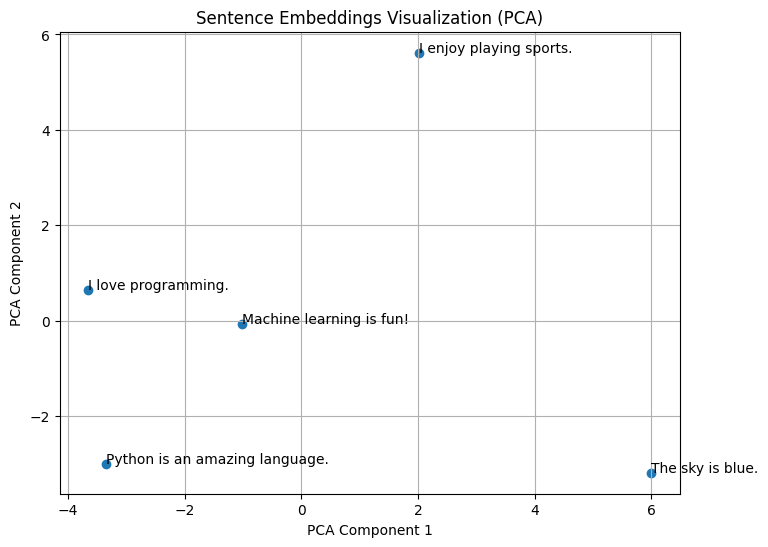

In [4]:
# Apply PCA to reduce dimensionality to 2D
sentence_embeddings_2d = pca.fit_transform(sentence_embeddings)

# Plot the sentences in 2D space
plt.figure(figsize=(8, 6))
plt.scatter(sentence_embeddings_2d[:, 0], sentence_embeddings_2d[:, 1])

# Annotate each sentence on the plot
for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (sentence_embeddings_2d[i, 0], sentence_embeddings_2d[i, 1]))

plt.title('Sentence Embeddings Visualization (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()


What Do We See?
- Sentences with similar meanings (e.g., "I love programming" and "Python is an amazing language") will be close together.
- Sentences with very different meanings (e.g., "The sky is blue" and "I love programming") will be far apart.
